In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Make_blobs dataset for clustering.
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=5, random_state=42)
# Number of training examples and cluster centers.
m = X.shape[0] 
n = X.shape[1] 
n_iter = 50


In [7]:
# # Plot the clusters.
# plt.figure(figsize=(10, 7), dpi=100)
# plt.scatter(X[:,0],X[:,1])
# plt.title('Original Dataset')

In [8]:
# Compute the initial centroids randomly.
import random
K=5
# Create an empty centroid array.
centroids = np.array([]).reshape(0,n) #shape = (0,2)
# Create 3 random centroids.
for k in range(K):
    centroids = np.r_[centroids, X[random.randint(0,m-1)].reshape(1,2)] #randint(0,249)

In [9]:
def find_mini(X, centroids):
  euclid = np.array([]).reshape(m,0)
  for k in range(K):
    dist = np.sum((X-centroids[k])**2, axis=1)
    euclid = np.c_[euclid, dist] 
  minimum = np.argmin(euclid, axis=1)
  return minimum


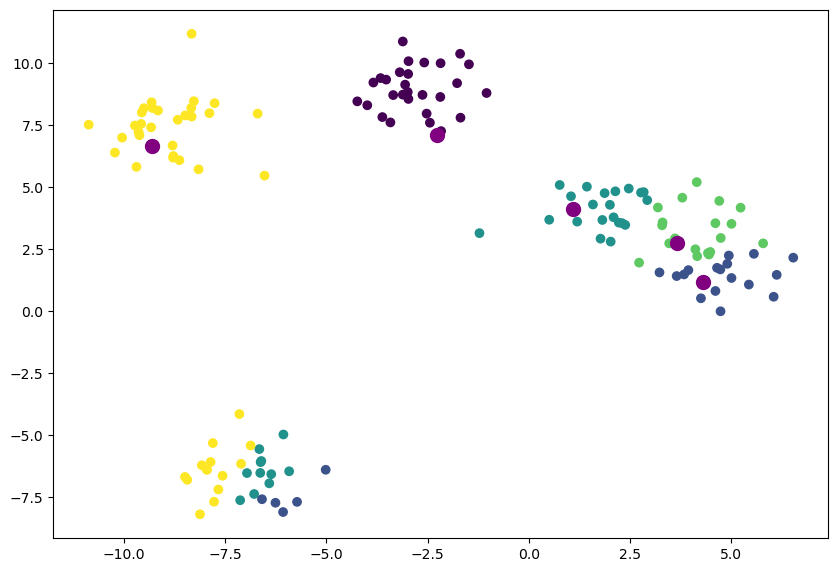

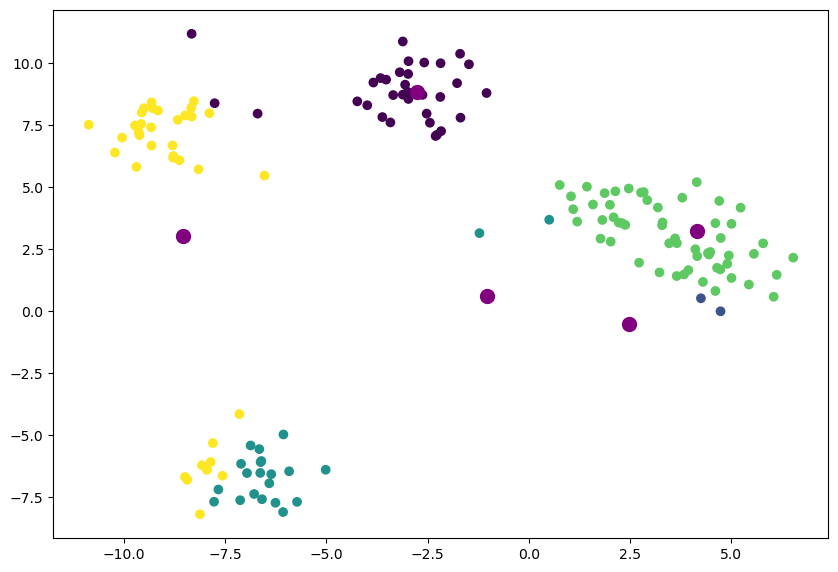

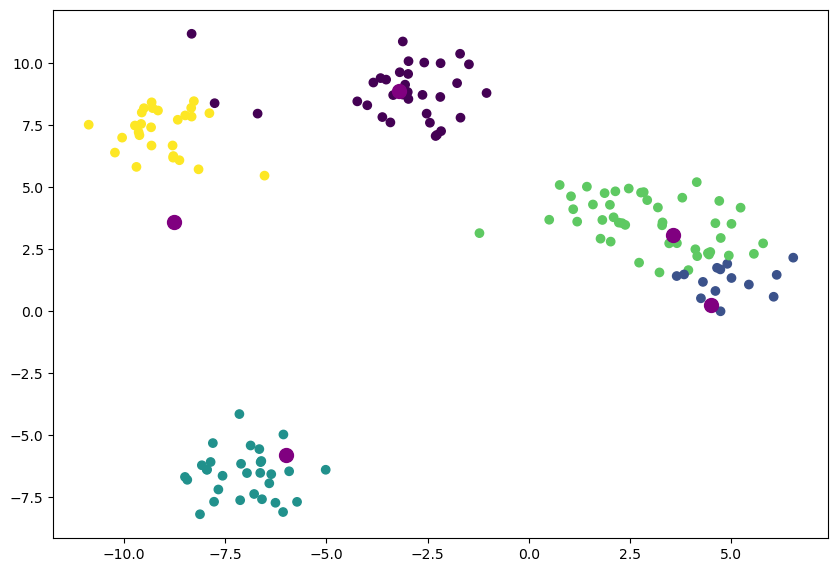

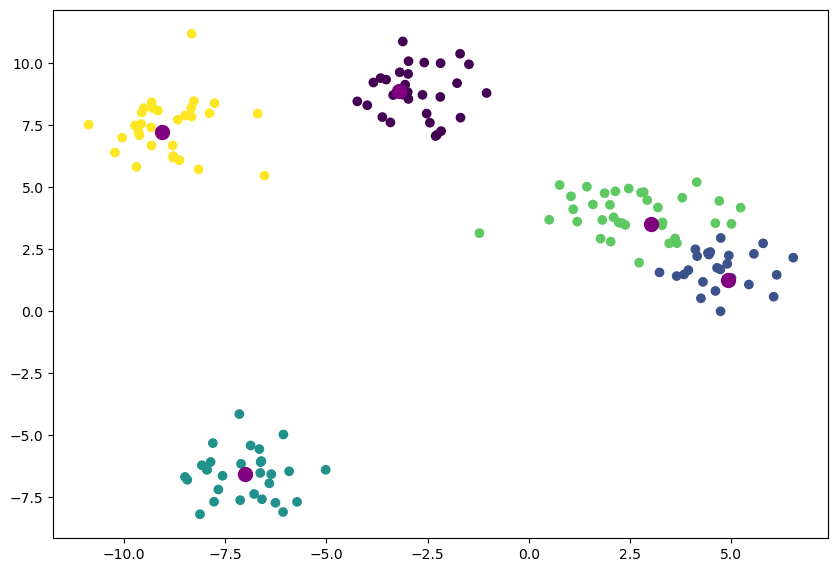

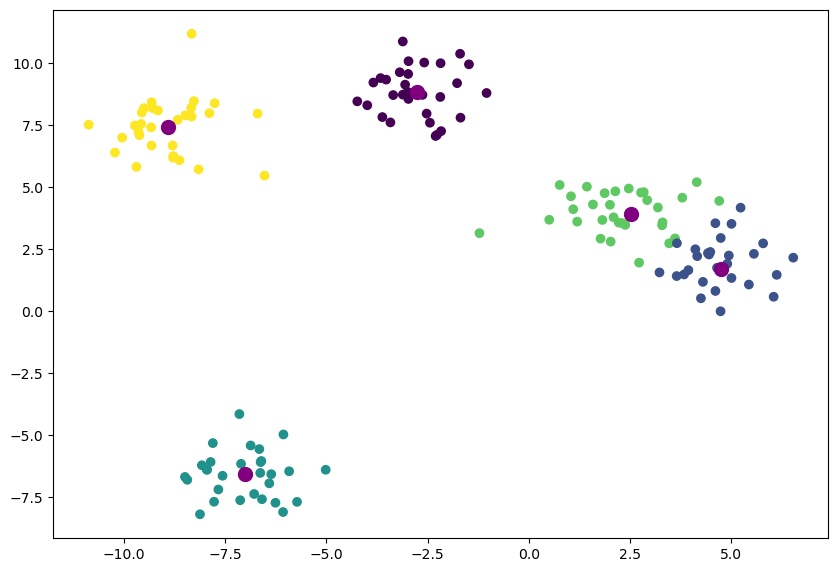

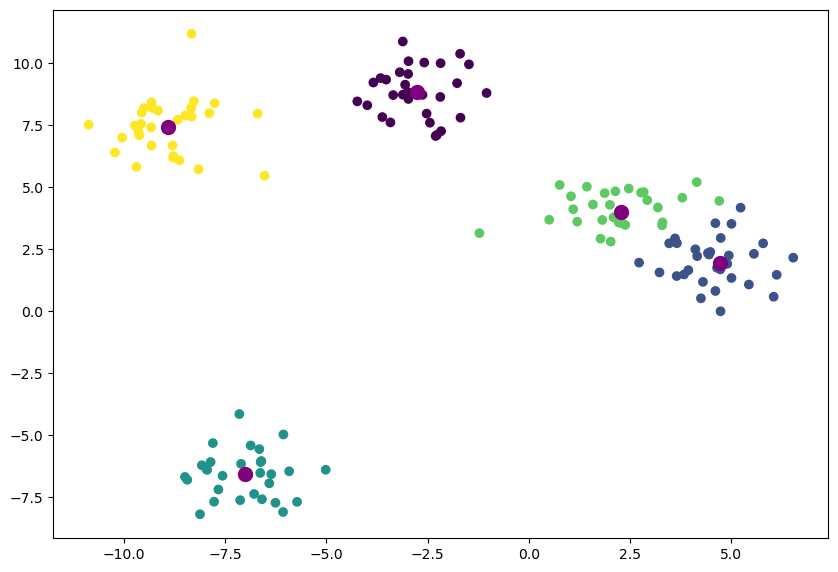

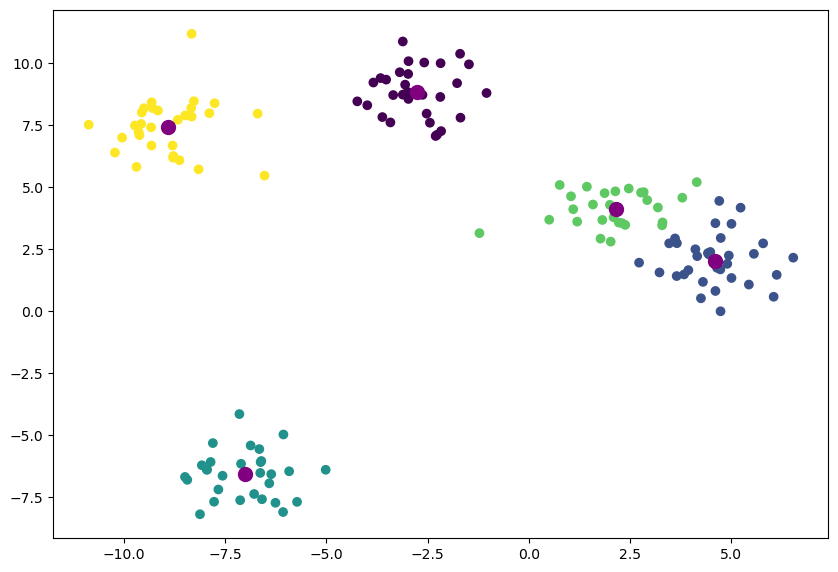

In [10]:
def find_clusters(X, n_clusters, centroids):    
    while True:
        labels = find_mini(X, centroids)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        
        plt.figure(figsize=(10, 7), dpi=100)
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis');
        plt.scatter(centroids[:,0], centroids[:,1], s=100, c='purple')
        plt.show()
        
        centroids = new_centroids
        # print("time")
    return centroids, labels


centers, labels = find_clusters(X, 5, centroids)